<a href="https://colab.research.google.com/github/RMoulla/Fondamentaux_R/blob/main/R%C3%A9gression_Lin%C3%A9aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse des prix de biens immobiliers avec une régression linéaire

In [1]:
dataset <- read.csv("selogerdata.csv")
head(dataset)

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,⋯,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
1,11,750116,75016,75016,0,178817,144013899,227883,0,0,⋯,13,3,11,59000,1,0,0,69.00,Appartement,Paris 16√®me
2,8,750110,75010,75010,0,12089,149750677,3765,0,0,⋯,7,1,8,77500,0,0,0,8.49,Appartement,Paris 10√®me
3,6,750118,75018,75018,0,115811,138648733,108873,0,0,⋯,8,2,6,94000,0,0,0,37.00,Appartement,Paris 18√®me
4,16,750110,75010,75010,0,12089,149750679,3765,0,0,⋯,4,1,16,96000,0,0,0,10.26,Appartement,Paris 10√®me
5,4,750116,75016,75016,0,97567,147153067,145098,0,0,⋯,5,2,4,100000,0,0,0,14.93,Appartement,Paris 16√®me
6,0,770288,77000,77000,0,274799,149790411,302393,0,0,⋯,5,2,0,110000,0,0,0,38.65,Appartement,Melun


## Régression linéaire simple : prix en fonction de la surface

In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Visualiser la relation entre le prix et la surface

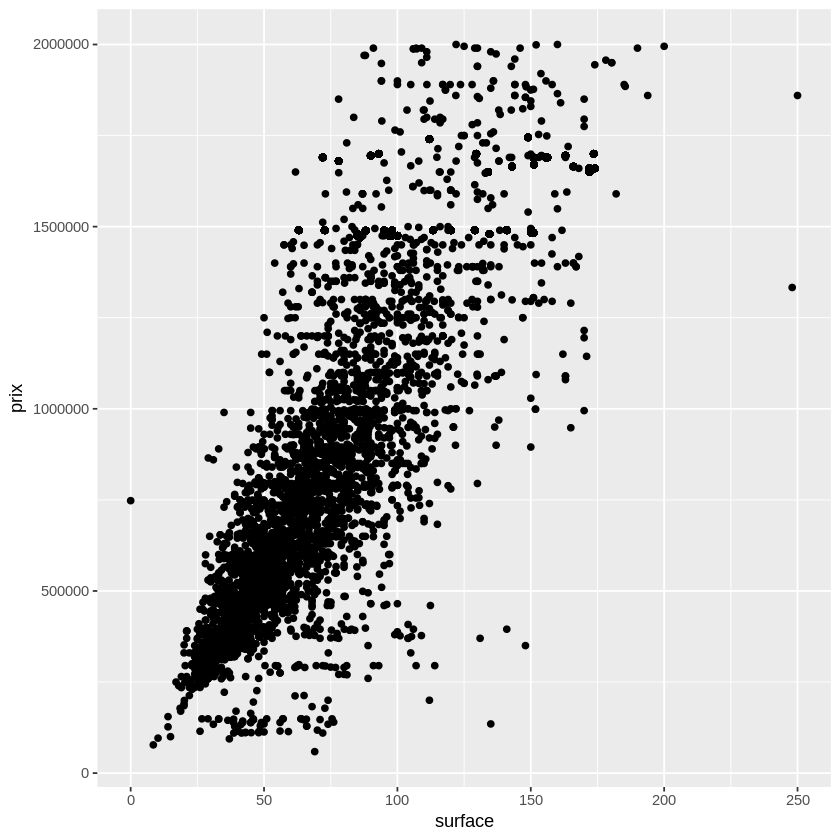

In [3]:
dataset %>% ggplot(aes(surface, prix)) + geom_point()

### Modèle de régression linéaire simple

In [6]:
# Régression linéaire : prix en fonction de la surface
rl = lm(prix ~ surface, dataset)
summary(rl)


Call:
lm(formula = prix ~ surface, data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1419380  -212683   -59035   256214   834936 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 362138.46    8418.18   43.02   <2e-16 ***
surface       8831.42      81.45  108.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 292900 on 8897 degrees of freedom
Multiple R-squared:  0.5693,	Adjusted R-squared:  0.5692 
F-statistic: 1.176e+04 on 1 and 8897 DF,  p-value: < 2.2e-16


$$ y = \beta_1\times x + \beta_0 $$
$$ y = 8831.42\times x + 362138.46$$

### Prédire sur les données d'entraînement

In [18]:
# Calculer les prédictions
predictions <- predict(rl, dataset['surface'])
predictions[100]

100 
1148135

In [19]:
# Vraie valeur du prix<
dataset$prix[100]

[1] 260000

In [20]:
dataset['predictions'] <- predictions

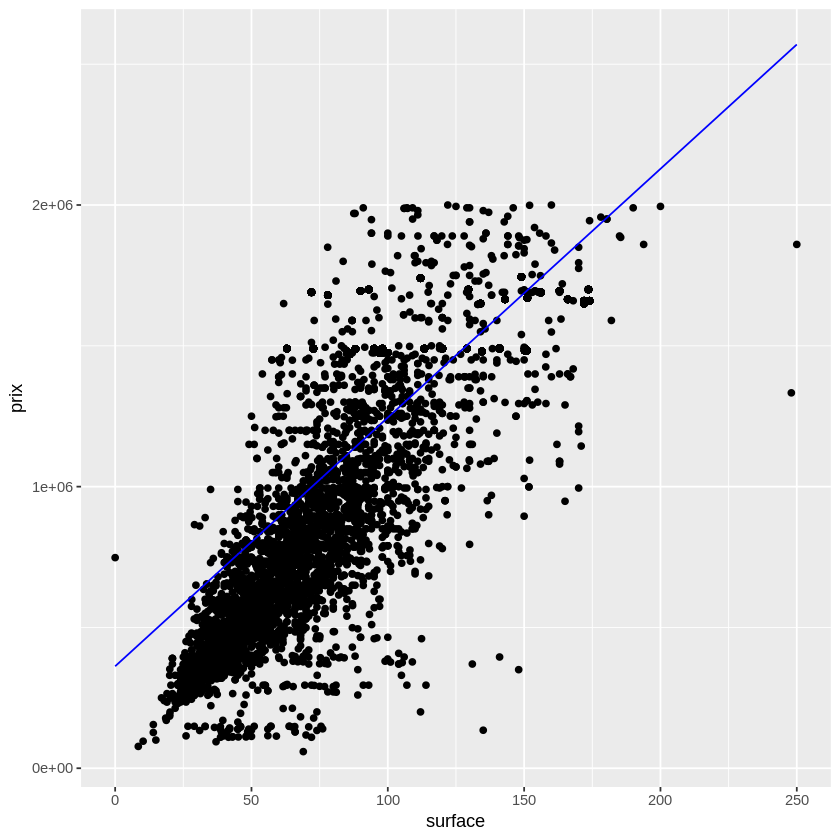

In [23]:
dataset %>% ggplot(aes(surface, prix)) + geom_point() + geom_line(aes(surface, predictions), colour = "blue")

## Régression linéaire multiple

In [25]:
# Noms des colonnes
names(dataset)

[1] "number"                          "codeinsee"                      
 [3] "codepostal"                      "cp"                             
 [5] "etage"                           "idagence"                       
 [7] "idannonce"                       "idtiers"                        
 [9] "idtypechauffage"                 "idtypecommerce"                 
[11] "idtypecuisine"                   "idtypepublicationsourcecouplage"
[13] "naturebien"                      "nb_chambres"                    
[15] "nb_photos"                       "nb_pieces"                      
[17] "position"                        "prix"                           
[19] "si_balcon"                       "si_sdEau"                       
[21] "si_sdbain"                       "surface"                        
[23] "typedebien"                      "ville"                          
[25] "predictions"

In [29]:
rl_multiple <- lm(prix ~ surface + nb_pieces + factor(naturebien) + si_balcon + factor(ville), dataset)
summary(rl_multiple)


Call:
lm(formula = prix ~ surface + nb_pieces + factor(naturebien) + 
    si_balcon + factor(ville), data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1273013   -96832     7697   106737   936086 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -478290.86  181327.18  -2.638 0.008361 ** 
surface                                 8626.81      99.23  86.937  < 2e-16 ***
nb_pieces                              12640.56    2556.88   4.944 7.81e-07 ***
factor(naturebien)2                    86531.37   44737.76   1.934 0.053122 .  
factor(naturebien)3                   163844.59    5451.53  30.055  < 2e-16 ***
si_balcon                              54404.25    4625.70  11.761  < 2e-16 ***
factor(ville)√âtampes                 138652.84  256398.75   0.541 0.588680    
factor(ville)√âvry                     80265.20  256398.27   0.313 0.754251    
factor(ville)Argenteuil                2432